# Machine Learning (Unsupervised, Clustering)

Materi ini: [klik disni](https://sanbercode.com/bootcamp/class/371/materi/machine-learning-unsupervised-clustering-/59e18898-c28c-495c-b1e9-ec66cf8e3877)

Machine Learning (ML) merupakan sebuah cabang dari Artificial Inteligence (kecerdasan buatan). Proses dalam ML ialah kita memerintahkan mesin untuk belajar dan melakukan improvisasi dari pengalaman (data), kemudian membuat sebuah keputusan atau prediksi di masa depan.

Hal pertama yang perlu kita lakukan adalah melakukan instalasi library scikit-learn yang akan kita gunakan.

#### Install library scikit-learn: [CLICK](https://scikit-learn.org/stable/install.html)

Terdapat 2 tipe umum cara mesin dalam mempelajari data:

1. Supervised Learning
2. Unsupervised Learning
<br></br>
1. Supervised Learning adalah metode belajar mesin dimana Algoritma belajar menggunakan labeled data pada input maupun output. Sedangkan Unsupervised Learning adalah metode belajar mesin dimana Algoritma belajar menggunakan no labeled data pada input maupun output. sebagai contoh, sebuah data target memiliki labeled 'Kucing' dan 'Anjing' maka setelah mesin dilatih akan menghasilkan kolom hasil prediksi yang memiliki label 'Kucing' dan 'Anjing', ini merupakan Supervised Learning. 
2. Sedangkan Unsupervised Learning, hasil keluaran akan dikelompokkan berdasarkan jenis Kucing maupun Anjing tanpa adanya label data. Pada pelatihan kita kali ini, hanya akan dijelaskan unsupervised yang akan dimanfaatkan untuk menyelesaikan masalah pengolahan data kita.  

# Unsupervised Learning - Clustering
Clustering adalah proses pengelompokan nilai(data point) yang mirip/serupa ke dalam kelompok yang sama. Perhatikan gambar di bawah ini, akan terbentuk 3 cluster:  
Ada banyak algoritma yang dapat digunakan untuk melakukan clustering. Salah satunya adalah dengan cara K-mean Clustering. Perhatikan gambar di bawah ini, perbedaan antara data sebelum dan sesudah dilakukan kmean clustering.    Lalu bagaimana tahapan clustering data menggunakan algoritma K-means clustering?

1. Inisiasi jumlah kluster secara random, misalkan kita pilih k=2. K adalah sebuah parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan. => PILIH JUMLh k cluster
2. Tentukan posisi centroid secara random. => pilh posisi centroid(memnggunakan rata2)
![](image/clustering1.png) 

3. Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance. => adalah formula dari titik dijumlahkan satu2 ![](image/clustering2.png)

4. Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid. => setelah menjumlah dan merata2kan, ditemukan titik centroid baru, hitung kembali tiap jarak data poin ke centroid baru, dibentuk cluster dan dihitung lagi, begitu terus. akan berhenti ketika centroid tidak berubah 

5. Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi.  ![](image/clustering3.png)

## Memilih jumlah kluster yang tepat
Seperti pada namanya, penentuan nilai K merupakan salah satu hal penting untuk dilakukan pada algoritma K-Means. Untuk dapat menentukan nilai tersebut kita akan menggunakan dua metode penentuan nilai k terbaik, yaitu Elbow Method dan Silhouette Method. Kita akan menggunakan data yang kita generate agar lebih mudah membayangkan.

Sekarang mari kita persiapkan datanya. Pada kesempatan kali ini saya akan menggunakan data artificial yang dari awal sudah saya tentukan akan memiliki 3 centroid.

misal pi = data centroid<br>
c1,c2 = centroid<br>
gunakan inersia, jarak intercluster- jarak dari centroid ke data point masing2 dalam 1 cluster<br>
semakin banyak jumlah cluster, semakin kecil nilai inersia. sampai pd batasnya nilai 0, ketika inersio 0, artinya tiap data point memiliki jumlah cluster masing2, maka tiap centroid nya juga bernilai 0

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, shuffle=True, random_state=31)
plt.scatter(X[:, 0], X[:, 1], s = 20, marker = "o", alpha = 0.8)
plt.show()

hasil viz

![](image/clustering4.png)

## Elbow Method
Elbow Method menggunakan apa yang dinamakan kuadrat jarak, dimana jarak yang dimaksud disni adalah jarak antar titik dengan pusat klusternya dimana nanti ini akan dijumlahkan dan dinamakan WSS (Within-Cluster-Sum of Squared). Nilai K terbaik didapatkan dimana nilai WSS sudah mulai stabil, atau saat membentuk 'siku'.<br>
WCSS = inersianya

sse = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(X)
    centroids = kmeans.cluster_centers_
    prediksi = kmeans.predict(X)
    nilai_sse = 0
    
    for i in range(len(X)):
        titik_pusat = centroids[prediksi[i]]
        nilai_sse += (X[i, 0] - titik_pusat[0]) ** 2 + (X[i, 1] - titik_pusat[1]) ** 2
    
    sse.append(nilai_sse)
    k_list.append(k)

#LAlu kita lakukan plot
 plt.plot(k_list,sse)
    plt.show() 

hasil viz

![](image/clustering5.png)

Dari Plot tersebut kita mengetahui nilai terbaik adalah nilai k = 3 , dimana dari data sebelumnya ini terbukti. Akan tetapi, tidak setiap waktu kita dapat dengan jelas melihat dimana keberadaan titik belok dari plot. Pada saat itulah kita akan menggunakan metode lain.

sebenarnya ketepatan clusteirng rangenya dari 0 dan 1, misal kalo nilainya udah 1, artinya cluster2nya terpisah dengan baik dan kita bisa membedakan dengan jelas. kalo 0, berarti cluster2nya tidak berbeda antar cluster 1 dan lainnnya.<br>
kalo inersia = jarak antar data point ke centroidnya<br>
kalo silhoute coef = menghitung jarak antar satu cluster ke cluster lainnya

## Silhouette Method

![](image/silhoute.png)

Silhouette Method menggunakan nilai koefisien yang dihitung dari seberapa dekat relasi antara objek dalam sebuah cluster, dan seberapa jauh sebuah cluster terpisah dengan cluster lain. persamaan yang digunakan adalah,

Koefisien Silhouette = (x-y)/ max(x,y)

Dimana x adalah jarak dengan kluster lain dan y adalah jarak relasi antar objek pada kluster yang sama. Nilai K optimum didapatkan dari nilai puncak plot K terhadap Koefisien Silhouette

Kita akan membutuhkan modul tambahan dari sklearn untuk menggunakan metode ini.

from sklearn.metrics import silhouette_score

data = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    data.append(silhouette_score(X, labels, metric = 'euclidean'))
    k_list.append(k)

plt.plot(k_list,data)
plt.show()

hasil viz

![](image/clustering6.png)

Dari hasil tersebut kita dapat melihat bahwa nilai puncak berada pada nilai K = 3 dan ini sesuai dengan data yang kita miliki.

# K-MEANS CLUSTERING INTUITION

scope of ai and ml
1. artificial intelligence<br>
atau kecerdasan buatan, sgt byk di industri 4.0 bahkan di society 4.0, byk cabangnya: comp vision, robotik, neutral languauge, salah satunya ML
2. machine learning<br>
sebuah sistem dimanakit memerintahkan mesin utk belajar, dlm hal ini mempelajari data, supaya mesin tsb mampu utk mengambil keputusan/prediktif analysis
3. deep learning<br>
umumnya digunakan utk kasus lebih kompleks, kaya image recognation, text recognize, image clasification, 

tipe2 machine learning<br>
1. supervised learning<br>
mesin belajar dengan cara dibimbing, belajar berdasarkan label
2. unsupervised leaning<br>
mesin mempelajari data tidak dengan cara dibimbing, meskipun data2 tidak dberi label, mesin mampu mengelompokan data menjadi bbrp kelompok(keseragaman yang sama)

## K-MEANS CLUSTERING HANDS-ON

### import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt #viz
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler #
from sklearn.cluster import KMeans #clustering with kmeans

### import dataset

In [2]:
dataset = pd.read_csv('price.csv')
dataset

Observation  Dist_Taxi  Dist_Market  Dist_Hospital  Carpet  Builtup  \
0              1     9796.0       5250.0        10703.0  1659.0   1961.0   
1              2     8294.0       8186.0        12694.0  1461.0   1752.0   
2              3    11001.0      14399.0        16991.0  1340.0   1609.0   
3              4     8301.0      11188.0        12289.0  1451.0   1748.0   
4              5    10510.0      12629.0        13921.0  1770.0   2111.0   
..           ...        ...          ...            ...     ...      ...   
931          932     9297.0      12537.0        14418.0  1174.0   1429.0   
932          933    10915.0      17486.0        15964.0  1549.0   1851.0   
933          934     9205.0      10418.0        14496.0  1118.0   1337.0   
934          935    10915.0      17486.0        15964.0  1549.0   1851.0   
935          936    10915.0      17486.0        15964.0  1549.0   1851.0   

          Parking City_Category  Rainfall  House_Price  
0            Open         CAT B       530      6649000  
1    Not Provided         CAT B       210      3982000  
2    Not Provided         CAT A       720      5401000  
3         Covered         CAT B       620      5373000  
4    Not Provided         CAT B       450      4662000  
..            ...           ...       ...          ...  
931       Covered         CAT C      1110      5434000  
932  Not Provided         CAT C      1220      7062000  
933          Open         CAT A       560      7227000  
934  Not Provided         CAT C      1220      7062000  
935  Not Provided         CAT C      1220      7062000  

[936 rows x 10 columns]

 kolom observasi, nilainya ga seragam. ga ada nilainya, bisa di drop 

dataset ttg harga rumah berdasar data feature, 
- jarak rumah ke pangkalan taxi
- jarak ke supermarket
- jarak ke rs
- ada luas karpet
- curah hujan
data diatas ada missing value, 
1. setelah baca data perlu => preprocessing
2. preprocessing => meliputi 
- ketika ada data missing value, berarti perlu handling missing value.
- ketika data memliki pencilan, maka butuh di handling outlier/data pencilan
- scalling data = penting, ketika tiap data jaraknya berjauhan, akan  mempengaruhi cluster, hasil analisa, dan segalanya, diperlukan agar jarak antar datapoint sama

### 1. Finding Missing Value

In [3]:
dataset.isnull().sum()

Observation       0
Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64

### 1.1 Handling Missing Value

In [4]:
dataset.fillna(method='ffill', inplace=True)
# mengisi dgn data didepannya, misal data yg missing value sebelumnya angka1, maka nanti missing value akn diisi angka1

In [22]:
dataset.isnull().sum()

Observation      0
Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64

### 2. Finding Outlier

### 2.1 Dengan IQR

In [5]:

#buat fungsi
def get_lower_upper_bound(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound


untuk menemukkan pencilan bisa menggunakan z scores tp ini dicontohkan dgn interquartil range

In [6]:
#buat fungsi untuk menemukan nilai outlier
def get_outliers_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    #gunakan np.where untuk filtering dengan kondisi atau
    return x[np.where((x > upper_bound) | (x < lower_bound))]

In [7]:
print(get_outliers_iqr(dataset['House_Price'].values))
print(get_outliers_iqr(dataset['Builtup'].values))

[150000000  11632000     30000]
[ 2617.   932. 12730.  2667.  2647.   951.]


kenapa cuma 2 yg  di cek pencilan? karena  kita akan coba melakukan clustering unutk 2 data feature ini

### 2.2 Dengan Boxplot

<AxesSubplot:xlabel='House_Price'>

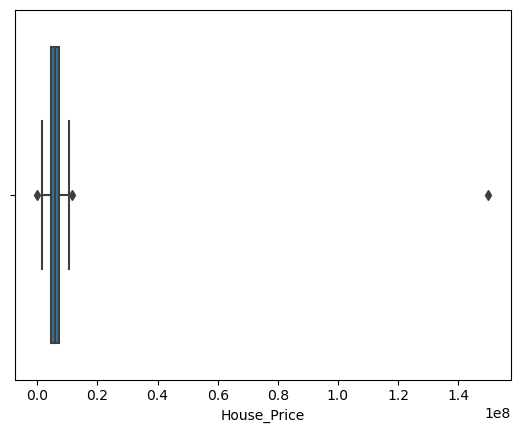

In [8]:
# selain menggunakan iqr, kita jg bisa menggunakan boxplot
sns.boxplot(x='House_Price', data=dataset)

<AxesSubplot:xlabel='Builtup'>

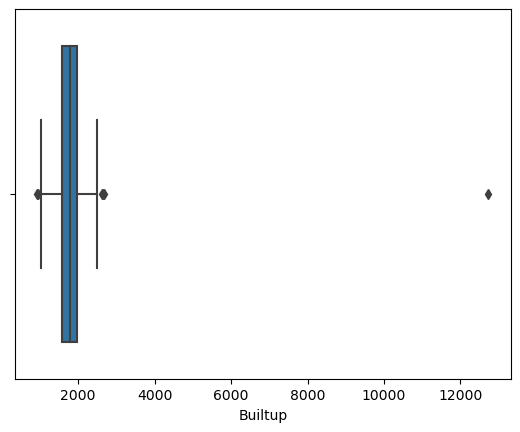

In [9]:
# selain menggunakan iqr, kita jg bisa menggunakan boxplot
sns.boxplot(x='Builtup', data=dataset)

### 3. Handling Outliers

In [10]:
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
	# akan ambil nilai yg negasi dari kondisi diatas, berati akan ambil nilai dalam range kuartil batas atas dan bawah
    df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [11]:
# setelah handling, buat df baru, hanya ambil 2 kolom, karena akan coba clustering 2 data tsb
df_outlier_removed = remove_outlier_IQR(dataset[['Builtup','House_Price']])
# ketika menggunakan iqr, nilai yg melebihi batas atas dan bawah akan di nan kan, makanya perlu di drop kan aja karena gada fungsinya
# nanti nilai nan tsb akan di remove
df_outlier_removed.dropna(axis=0, inplace=True)

In [12]:
#data baru hasil dari remove dan drop outlier
df_outlier_removed

Builtup  House_Price
0     1961.0    6649000.0
1     1752.0    3982000.0
2     1609.0    5401000.0
3     1748.0    5373000.0
4     2111.0    4662000.0
..       ...          ...
931   1429.0    5434000.0
932   1851.0    7062000.0
933   1337.0    7227000.0
934   1851.0    7062000.0
935   1851.0    7062000.0

[928 rows x 2 columns]

In [13]:
#cek apa masih ada nilai yg null
df_outlier_removed.isnull().sum()

Builtup        0
House_Price    0
dtype: int64

<AxesSubplot:xlabel='House_Price'>

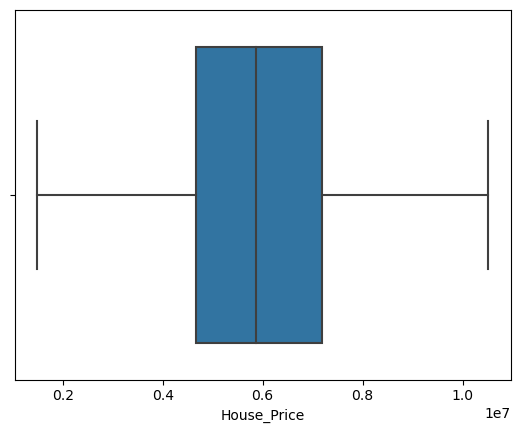

In [14]:
sns.boxplot(x='House_Price', data=df_outlier_removed)

<AxesSubplot:xlabel='Builtup'>

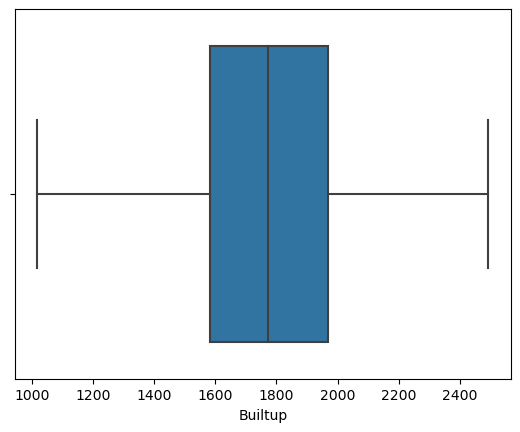

In [15]:
sns.boxplot(x='Builtup', data=df_outlier_removed)

### 4. Scalling data

In [16]:
# penting untuk melakukan scalling data, misal kita lihat di house_price no1 lebih dari 6jt,, 
# nilai data diubah jadi float, lalu data yg tadi di standarscaller(jarak dari rentang -1 sampai dgn 1),setelah standar scaler/ scaling
# 3. sleanjutnya baru di clustering dengan kmeans, tentukan jmlh cluster 2, lalu perintahkan algoritma utk mempelajari data
# perintahkan algoritma utk mempelajari data, 
# kalo di supervised learning, disana perintahkan utk mempelajari data dan perintan data utk memprediksi data yg baru
# kalo di clustering, perintahkan data utk mempelajari karena nanti setelah di plotkan,, data sudah bisa menclusterkan 
	#dirinya sendiri, makanya tidak menggunakan perintah predict    
# 4. buat var, dgn argumen label, hasil clustering akan masuk ke label 0 dan 1, karena ckustering 2
#5. buat df baru = dimana df awal(yg udh di handling outlier dan scalling) ditambah dgn kolom baru namanya label_kmeans1(bebas namanya)
#6. lakukan plotting, scatter digunakan utk melihat hubungan antar 2 variabel(cluterisasinya)
# scatter pertama, akses utk label kmean=0, x=builltup, y=houseprice, ambil kmeans yg 0
#7. tambahkan centroid, lihat posisi centroid. di kmeans cluster ada atribut clulster center utk posisi centroidnya
#plotkan posisi centroid, params1= semua cluster, utk label 0...params2: semua cluster/data yg labelnya 1

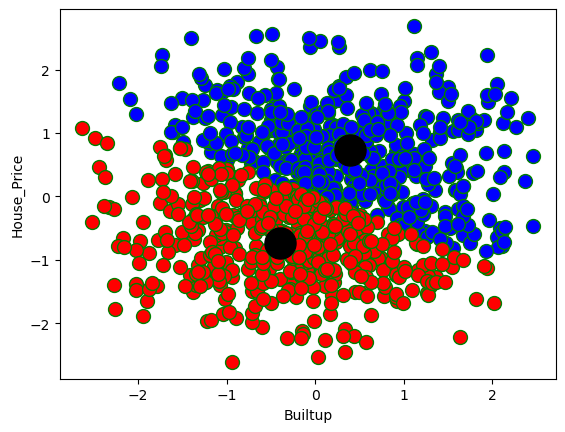

In [17]:
## Feature Scaling
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_removed.astype(float))

# 3. Clustering with KMeans
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_ #4

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['Builtup', 'House_Price'])
new_dfoutlier_std['label_kmeans1'] = labels1

#6
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans1 == 0], c='blue', s = 100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans1 == 1], c='red', s = 100, edgecolor='green', linestyle='-')
# plt.scatter(new_dfoutLier_std.Builtup[new_dfoutlier_std.label_kmeans == 2], new_dfoutlier_std['House_Price'][new dfoutlier_std.label_kmeans1 == 1], c='red', s = 100, edgecolor='green', linestyle='-')
                                                                                                                
centers = kmeans1.cluster_centers_ #7
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Builtup')
plt.ylabel('House_Price')
plt.show()

1. bisa dilihat ada 2 cluster, warna merah dan biru,, sulit  diinterpretasi utk cara baca data spt itu<br>
gunakan elbowmethod utk melihat jumlah cluster yg direkomendasikan method elbow

### 5. Using Elbow method to find the optimal number of clusters

- buat list kosong
- coba jumlah cluster dengan range 1-10
- inisialisasi k-means++ digunakan supaya tidak random saat direset kernel/run kembali, sudah disediakkan oleh algoritma kmeans
- perintahkan utk mempelajari data, yg udh kita handling outlier dan scalling
- lalu di plot

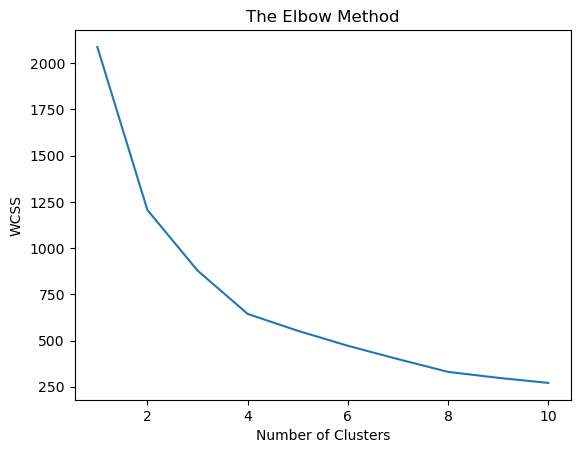

In [18]:
import warnings
warnings.filterwarnings('ignore')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')    
plt.show()

### 6. Training the K-Means model on the dataset

In [19]:
#coba gunakan jumlah cluster 4
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(dfoutlier_std)
#ditambah random state agar data tdk berubah saat reset kernel
kmeans2.labels_

array([3, 0, 0, 2, 2, 0, 3, 0, 0, 0, 1, 2, 2, 2, 1, 3, 3, 2, 1, 0, 2, 0,
       1, 2, 2, 0, 3, 0, 2, 1, 3, 3, 1, 0, 1, 3, 1, 2, 0, 1, 2, 0, 1, 0,
       0, 3, 2, 0, 0, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 0, 3, 1, 3, 2, 3, 1,
       2, 2, 1, 2, 3, 2, 1, 2, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 2, 1, 0, 3,
       1, 2, 1, 2, 3, 0, 0, 0, 0, 3, 2, 0, 3, 2, 3, 3, 3, 2, 1, 3, 1, 1,
       0, 1, 3, 3, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 3, 0, 3,
       3, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 3, 1, 2, 3, 0, 2, 2, 2, 1, 0,
       0, 2, 0, 0, 3, 3, 3, 2, 0, 1, 3, 0, 0, 2, 0, 1, 3, 2, 0, 1, 0, 0,
       1, 0, 3, 0, 2, 2, 0, 3, 3, 2, 2, 3, 0, 3, 3, 1, 0, 2, 3, 2, 1, 2,
       1, 3, 1, 3, 2, 3, 3, 1, 3, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0,
       1, 3, 3, 1, 2, 3, 2, 1, 1, 1, 2, 1, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0,
       0, 1, 3, 0, 1, 3, 2, 3, 1, 2, 3, 3, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0,
       2, 1, 3, 1, 3, 0, 0, 0, 1, 3, 0, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 3,
       2, 2, 2, 3, 0, 1, 2, 2, 0, 3, 0, 0, 2, 1, 2,

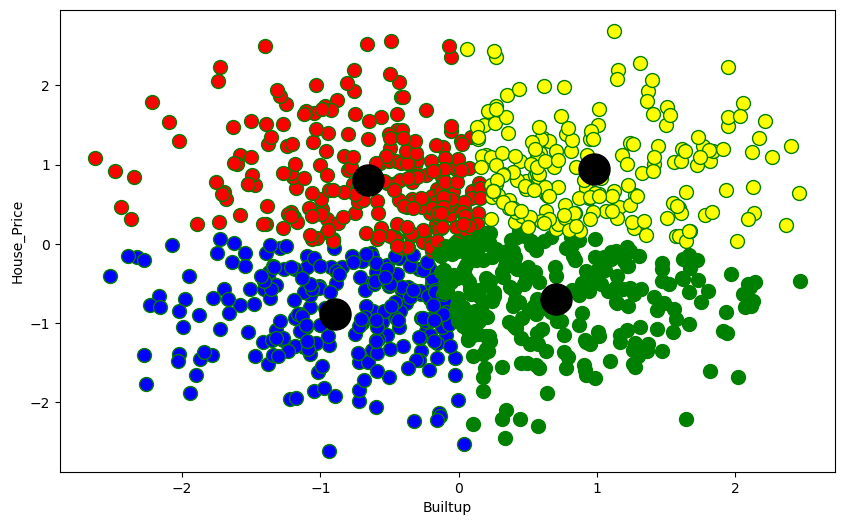

In [20]:
# coba assign ke var baru
labels2 = kmeans2.labels_

new_dfoutlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(10,6))
#x(kolom builtup), y(kolom house price), color,...
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans2 == 0], c='blue', s = 100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans2 == 1], c='red', s = 100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans2 == 2], c='green', s = 100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std.Builtup[new_dfoutlier_std.label_kmeans2 == 3], new_dfoutlier_std['House_Price'][new_dfoutlier_std.label_kmeans2 == 3], c='yellow', s = 100, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Builtup')
plt.ylabel('House_Price')
plt.show()

builtup = luas bangunan
house price = harga rumah

1. cluster biru => tidak luas dan harga rumah tidak mahal
2. cluster hijau => bnagunan luas dan harga murah
3. cluster 

, selain faktor luas, bisa dipengaruhi lagi oleh data feature lain... misal ga ada tempat parkir, jauh dari rs, jauh dari taxi, dll
=> dari clustering bisa dianalisa dan mengambil keputusan

### 7.  Cek koefisien silhoute

In [21]:
from sklearn.metrics import silhouette_score

print(silhouette_score(new_dfoutlier_std, labels=labels1))
print(silhouette_score(new_dfoutlier_std, labels=labels2))

0.34186743743059866
0.4929486730735917


- bisa dilihat silhout koef utk cluster2 adalh 0.34186743743059866
- dan yg bawah 0.4929486730735917
- => aartinya ckuster 4 lebih bisa dibandingkan dan lebih bisa diambil insightnya ketimbang cluster yang cuma 2 tadi